<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.881160,41.302718,46.862244,25.420888,182.467010,161.964951,20.502059
1,0.0,1.0,26.496565,23.023440,32.527318,30.607406,122.654730,96.158353,26.496377
2,0.0,2.0,47.073419,93.881477,71.845904,-112.985304,109.815497,175.459891,-65.644394
3,0.0,3.0,71.571053,23.882533,87.357541,6.488620,199.299747,191.274473,8.025274
4,0.0,4.0,68.576701,44.673959,34.526890,-54.362778,103.414771,174.077476,-70.662705
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,54.745394,21.901538,22.503425,7.357451,116.507807,98.123669,18.384138
29996,999.0,26.0,93.708936,48.783147,47.926863,-31.105977,169.312969,227.213173,-57.900205
29997,999.0,27.0,33.707840,62.976851,97.114345,-89.146969,114.652067,194.815365,-80.163298
29998,999.0,28.0,28.072240,85.795593,71.135868,-116.199091,78.804608,166.227686,-87.423077


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    58.881160  41.302718  46.862244   25.420888  182.467010   
      1.0    26.496565  23.023440  32.527318   30.607406  122.654730   
      2.0    47.073419  93.881477  71.845904 -112.985304  109.815497   
      3.0    71.571053  23.882533  87.357541    6.488620  199.299747   
      4.0    68.576701  44.673959  34.526890  -54.362778  103.414771   
...                ...        ...        ...         ...         ...   
999.0 25.0   54.745394  21.901538  22.503425    7.357451  116.507807   
      26.0   93.708936  48.783147  47.926863  -31.105977  169.312969   
      27.0   33.707840  62.976851  97.114345  -89.146969  114.652067   
      28.0   28.072240  85.795593  71.135868 -116.199091   78.804608   
      29.0   91.369882  44.884178  34.331211   53.107241  233.692512   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    161.964951  20.502059  
      1.0     96.158353  26.496377  
      2.0    175.459891 -65.644394  
      3.0    191.274473   8.025274  
      4.0    174.077476 -70.662705  
...                 ...        ...  
999.0 25.0    98.123669  18.384138  
      26.0   227.213173 -57.900205  
      27.0   194.815365 -80.163298  
      28.0   166.227686 -87.423077  
      29.0   200.912362  32.780150  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    58.881160  41.302718  46.862244   25.420888  182.467010   
      1.0    26.496565  23.023440  32.527318   30.607406  122.654730   
      2.0    47.073419  93.881477  71.845904 -112.985304  109.815497   
      3.0    71.571053  23.882533  87.357541    6.488620  199.299747   
      4.0    68.576701  44.673959  34.526890  -54.362778  103.414771   
...                ...        ...        ...         ...         ...   
999.0 25.0   54.745394  21.901538  22.503425    7.357451  116.507807   
      26.0   93.708936  48.783147  47.926863  -31.105977  169.312969   
      27.0   33.707840  62.976851  97.114345  -89.146969  114.652067   
      28.0   28.072240  85.795593  71.135868 -116.199091   78.804608   
      29.0   91.369882  44.884178  34.331211   53.107241  233.692512   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    161.964951  20.502059  
      1.0     96.158353  26.496377  
      2.0    175.459891 -65.644394  
      3.0    191.274473   8.025274  
      4.0    174.077476 -70.662705  
...                 ...        ...  
999.0 25.0    98.123669  18.384138  
      26.0   227.213173 -57.900205  
      27.0   194.815365 -80.163298  
      28.0   166.227686 -87.423077  
      29.0   200.912362  32.780150  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.881160,41.302718,46.862244,25.420888,182.467010,161.964951,20.502059
1,0.0,1.0,26.496565,23.023440,32.527318,30.607406,122.654730,96.158353,26.496377
2,0.0,2.0,47.073419,93.881477,71.845904,-112.985304,109.815497,175.459891,-65.644394
3,0.0,3.0,71.571053,23.882533,87.357541,6.488620,199.299747,191.274473,8.025274
4,0.0,4.0,68.576701,44.673959,34.526890,-54.362778,103.414771,174.077476,-70.662705
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,54.745394,21.901538,22.503425,7.357451,116.507807,98.123669,18.384138
29996,999.0,26.0,93.708936,48.783147,47.926863,-31.105977,169.312969,227.213173,-57.900205
29997,999.0,27.0,33.707840,62.976851,97.114345,-89.146969,114.652067,194.815365,-80.163298
29998,999.0,28.0,28.072240,85.795593,71.135868,-116.199091,78.804608,166.227686,-87.423077


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    58.881160  41.302718  46.862244   25.420888  182.467010   
      1.0    26.496565  23.023440  32.527318   30.607406  122.654730   
      2.0    47.073419  93.881477  71.845904 -112.985304  109.815497   
      3.0    71.571053  23.882533  87.357541    6.488620  199.299747   
      4.0    68.576701  44.673959  34.526890  -54.362778  103.414771   
...                ...        ...        ...         ...         ...   
999.0 25.0   54.745394  21.901538  22.503425    7.357451  116.507807   
      26.0   93.708936  48.783147  47.926863  -31.105977  169.312969   
      27.0   33.707840  62.976851  97.114345  -89.146969  114.652067   
      28.0   28.072240  85.795593  71.135868 -116.199091   78.804608   
      29.0   91.369882  44.884178  34.331211   53.107241  233.692512   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    161.964951  20.502059  
      1.0     96.158353  26.496377  
      2.0    175.459891 -65.644394  
      3.0    191.274473   8.025274  
      4.0    174.077476 -70.662705  
...                 ...        ...  
999.0 25.0    98.123669  18.384138  
      26.0   227.213173 -57.900205  
      27.0   194.815365 -80.163298  
      28.0   166.227686 -87.423077  
      29.0   200.912362  32.780150  

[30000 rows x 7 columns]

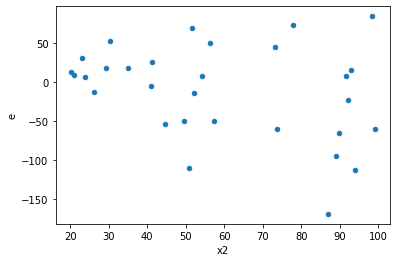

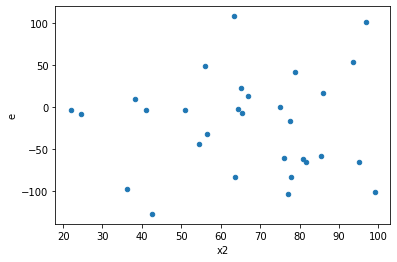

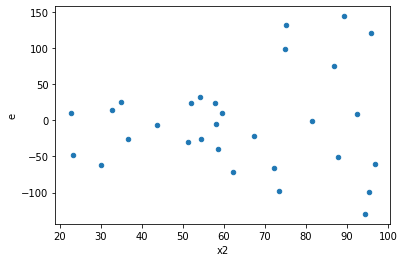

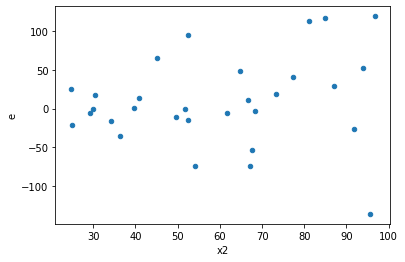

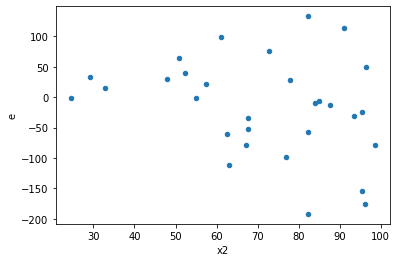

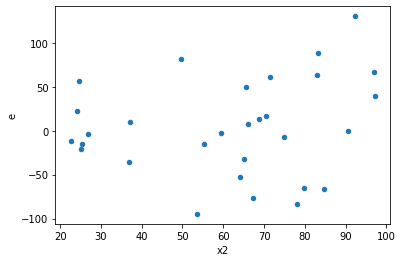

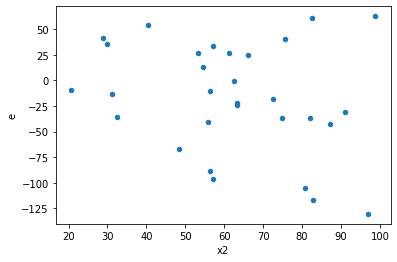

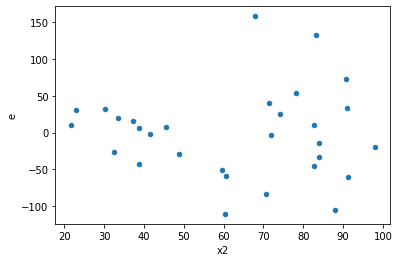

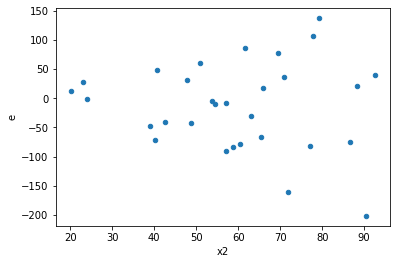

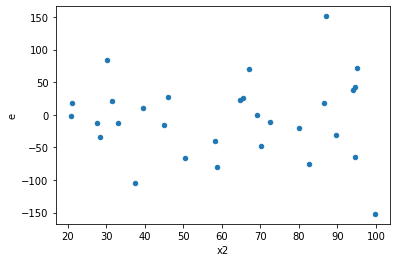

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,9.0,25723.576432228012,32804.17604199343,1714.9050954818674,3644.908449110381,2.1254286658272514,0.2549041997554451,0.8725479001222775,0.12745209987772255,Reject001=1 : Homoscedasticity
1.0,9.0,15.0,18511.51681463426,55167.374670293706,2056.8352016260287,3677.8249780195806,1.7880990052640484,0.30721853938223087,0.8463907303088846,0.15360926969111544,Reject001=1 : Homoscedasticity
2.0,13.0,11.0,16188.883488610174,87943.30542730795,1245.2987298930902,7994.845947937086,6.420022566491696,0.003993432556874454,0.9980032837215628,0.001996716278437227,Reject001=0 : Heteroscedasticity
5.0,5.0,19.0,5128.323364990969,72047.82741985236,1025.6646729981937,3791.9909168343347,3.697105902799299,0.03326642238660371,0.9833667888066981,0.016633211193301856,Reject001=1 : Homoscedasticity
6.0,15.0,9.0,39871.52650338061,29314.786024538706,2658.101766892041,3257.1984471709675,1.2253851555801847,0.7791966642964196,0.6104016678517902,0.3895983321482098,Reject001=1 : Homoscedasticity
10.0,10.0,14.0,6941.224384264809,44162.49656332013,694.1224384264808,3154.464040237152,4.544535467529426,0.010607237578105444,0.9946963812109473,0.005303618789052722,Reject001=1 : Homoscedasticity
12.0,15.0,9.0,42728.544507668725,35553.50109355581,2848.569633844582,3950.38901039509,1.3867974170122124,0.6324032670195545,0.6837983664902227,0.31620163350977726,Reject001=1 : Homoscedasticity
15.0,8.0,16.0,15088.454487968482,63602.4607726794,1886.0568109960602,3975.1537982924624,2.1076532663897396,0.19452521376184206,0.902737393119079,0.09726260688092103,Reject001=1 : Homoscedasticity
16.0,14.0,10.0,25458.602220104913,71839.76593097653,1818.4715871503508,7183.976593097653,3.950557514266888,0.03461511779981197,0.982692441100094,0.017307558899905984,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,9.0,25723.576432228012,32804.17604199343,1714.9050954818674,3644.908449110381,2.1254286658272514,0.2549041997554451,Reject001=1 : Homoscedasticity
1.0,9.0,15.0,18511.51681463426,55167.374670293706,2056.8352016260287,3677.8249780195806,1.7880990052640484,0.30721853938223087,Reject001=1 : Homoscedasticity
2.0,13.0,11.0,16188.883488610174,87943.30542730795,1245.2987298930902,7994.845947937086,6.420022566491696,0.003993432556874454,Reject001=0 : Heteroscedasticity
3.0,11.0,13.0,61604.25769520487,14095.319789990117,5600.387063200443,1084.2553684607783,0.19360364850231634,0.009997916007256736,Reject001=0 : Heteroscedasticity
4.0,11.0,13.0,70057.25257314584,43210.12163274574,6368.841143013258,3323.8555102112105,0.521893298258435,0.28717645093570243,Reject001=1 : Homoscedasticity
5.0,5.0,19.0,5128.323364990969,72047.82741985236,1025.6646729981937,3791.9909168343347,3.697105902799299,0.03326642238660371,Reject001=1 : Homoscedasticity
6.0,15.0,9.0,39871.52650338061,29314.786024538706,2658.101766892041,3257.1984471709675,1.2253851555801847,0.7791966642964196,Reject001=1 : Homoscedasticity
7.0,12.0,12.0,56807.991663363,20076.853275653175,4733.99930528025,1673.0711063044312,0.35341600165388837,0.08403976049539143,Reject001=1 : Homoscedasticity
8.0,9.0,15.0,42013.32508374624,60452.978965168186,4668.14723152736,4030.198597677879,0.8633400785774377,0.84977167996617,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      832
Reject001=0 : Heteroscedasticity    168
Name: Result_test, dtype: int64